In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataprob
import copy
import linkage

In [2]:
#### Load Experimental Data

## EDTA --> Buffer

cell_vol = 201.3
sd = 0.1

## EDTA --> Buffer

blank1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa2.csv",
                                        cell_contents={},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
blank1.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

blank2 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240806\4mMEDTAinto0uMCa3.csv",
                                        cell_contents={},
                                        syringe_contents={"ET":4e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="ET")
blank2.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## Ca --> Buffer

blank3 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer.csv",
                                        cell_contents={},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
blank3.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

blank4 = linkage.experiment.Experiment(r"S:\Harmslab\ITC2\20241220\1mMCatobuffer2.csv",
                                        cell_contents={},
                                        syringe_contents={"CT":1e-3},
                                        cell_volume=cell_vol,
                                        conc_to_float="CT")
blank4.define_itc_observable(obs_column="heat",
                            obs_std="heat_stdev")

## EDTA --> Ca

edtaca1 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20241001\3mMEDTAto500uMCa.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca1.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca2 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20241001\3p5mMEDTAto500uMCaCl2HHR.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca2.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca3 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240915\3p5mMEDTAto500uMCaCl2lowres.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca3.define_itc_observable(obs_column="heat",
                            obs_std=sd)


edtaca4 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240913\3p5mMEDTAto500uMCaLOWRES.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3.5e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca4.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca5 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca5.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca6 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_2.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca6.define_itc_observable(obs_column="heat",
                            obs_std=sd)

edtaca7 = linkage.experiment.Experiment(r"C:\Users\willi\linkage\notebooks\data\20240912\3mMEDTAto500uMCaCl2_3.csv",
                                      cell_contents={"CT":500e-6},
                                      syringe_contents={"ET":3e-3},
                                      cell_volume=cell_vol,
                                      conc_to_float="ET")
edtaca7.define_itc_observable(obs_column="heat",
                            obs_std=sd)




In [3]:
#### Create model instance
#Full Lists
blank_list = [blank1, blank2, blank3, blank4]
edtaca_list = [edtaca1, edtaca2, edtaca3, edtaca4, edtaca5, edtaca6, edtaca7]


#Combine experiment types into one list
expt_list = blank_list + edtaca_list


# Read the model specification from file
spec_file_path = r"C:\Users\willi\linkage\src\linkage\model_specs\CaEDTA.txt"

# Read spec
with open(spec_file_path, 'r') as f:
    model_spec = f.read()

# Create GlobalModel with spec
gm = linkage.GlobalModel(
    model_name="GenericBindingModel",
    model_spec=model_spec,
    expt_list=expt_list
)

#Setup dataprob
f = dataprob.setup(gm.model_normalized,
                   method="ml",
                   vector_first_arg=True,
                   fit_parameters=gm.parameter_names)

gm._bm.print_summary()


===== GENERIC BINDING MODEL SUMMARY =====
Constants: ['KE']
Microspecies: ['C', 'E', 'EC']
Macrospecies: ['CT', 'ET']
Equilibria:
  E + C -> EC; KE
Final conservation equation: (C*ET*KE + (C - CT)*(C*KE + 1))/(C*KE + 1)
===== END SUMMARY =====



In [4]:
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,0.0,False,-inf,inf,NaN,NaN
dH_E,dH_E,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,0.0,False,-inf,inf,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,0.0,False,-inf,inf,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,0.0,False,-inf,inf,NaN,NaN


In [5]:
## Reasonable param_df changes, should +/- inf bounds be changed at instantiation of param_df to be actual numbers and not infs. maybe min/max float?

# Nuisance Params
# Get all parameter names containing 'nuisance_expt'
fudge_params = [col for col in f.param_df.index if 'nuisance_expt' in col]

# Link all fudge parameters (except 0) to the first one, set first one = 1.1
for param in fudge_params:
    f.param_df.loc[param, 'guess'] = 1.1
    f.param_df.loc[param, 'fixed'] = True
    f.param_df.loc[param, 'lower_bound'] = -2
    f.param_df.loc[param, 'upper_bound'] = 2

# ## K bounds

eq_constants = [col for col in f.param_df.index if 'K' in col]
for param in eq_constants:
    f.param_df.loc[param, 'upper_bound'] = 30
    f.param_df.loc[param, 'lower_bound'] = -30

# Heats
heat_constants = [col for col in f.param_df.index if 'dH_' in col]
for param in heat_constants:
    f.param_df.loc[param, 'upper_bound'] = 30000
    f.param_df.loc[param, 'lower_bound'] = -30000

In [6]:
### Parameters from CaEDTA fitting

# EDTA K/dH
f.param_df.loc["KE","guess"] = 16.18
f.param_df.loc["KE","upper_bound"] = 18
f.param_df.loc["KE","lower_bound"] = 15


f.param_df.loc["dH_E","guess"] = -10902
f.param_df.loc["dH_E","upper_bound"] = -10000
f.param_df.loc["dH_E","lower_bound"] = -12000


#Dilution Params
f.param_df.loc["nuisance_dil_CT","guess"] = -269.505231
f.param_df.loc["nuisance_dil_CT","upper_bound"] = 1000
f.param_df.loc["nuisance_dil_CT","lower_bound"] = -1000
# f.param_df.loc["nuisance_dil_CT","fixed"] = True

f.param_df.loc["nuisance_dil_ET","guess"] = -19.554765
f.param_df.loc["nuisance_dil_ET","upper_bound"] = 1000
f.param_df.loc["nuisance_dil_ET","lower_bound"] = -1000
# f.param_df.loc["nuisance_dil_ET","fixed"] = True



In [7]:
f.param_df

,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,
KE,KE,16.180000,False,15.0,18.0,NaN,NaN
dH_E,dH_E,-10902.000000,False,-12000.0,-10000.0,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,-269.505231,False,-1000.0,1000.0,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,-19.554765,False,-1000.0,1000.0,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.100000,True,-2.0,2.0,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.100000,True,-2.0,2.0,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,1.100000,True,-2.0,2.0,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,1.100000,True,-2.0,2.0,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.100000,True,-2.0,2.0,NaN,NaN


In [9]:
f.fit(
      y_obs=gm.y_obs_normalized,
      y_std=gm.y_std_normalized,
      method='trf',         # Algorithm to use for optimization
      tr_solver='exact',
      jac='3-point',        # More accurate Jacobian calculation
      ftol=1e-3,           # Tolerance for termination by the cost function
      xtol=1e-3,            # Tolerance for termination by the independent variables
      loss='arctan',        # Robust loss function for better handling of outliers
      f_scale=0.1,          # Scale factor for the loss function
)

In [10]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
f.fit_df

,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
KE,KE,16.394445,0.153518,16.092746,16.696145,16.180000,False,15.000000,18.000000,NaN,NaN
dH_E,dH_E,-11679.404513,73.733604,-11824.308588,-11534.500438,-10902.000000,False,-12000.000000,-10000.000000,NaN,NaN
nuisance_dil_CT,nuisance_dil_CT,-229.382055,26.286880,-281.042028,-177.722081,-269.505231,False,-1000.000000,1000.000000,NaN,NaN
nuisance_dil_ET,nuisance_dil_ET,-15.489512,5.671793,-26.635935,-4.343088,-19.554765,False,-1000.000000,1000.000000,NaN,NaN
nuisance_expt_0_ET_fudge,nuisance_expt_0_ET_fudge,1.100000,NaN,NaN,NaN,1.100000,True,-2.000000,2.000000,NaN,NaN
nuisance_expt_1_ET_fudge,nuisance_expt_1_ET_fudge,1.100000,NaN,NaN,NaN,1.100000,True,-2.000000,2.000000,NaN,NaN
nuisance_expt_2_CT_fudge,nuisance_expt_2_CT_fudge,1.100000,NaN,NaN,NaN,1.100000,True,-2.000000,2.000000,NaN,NaN
nuisance_expt_3_CT_fudge,nuisance_expt_3_CT_fudge,1.100000,NaN,NaN,NaN,1.100000,True,-2.000000,2.000000,NaN,NaN
nuisance_expt_4_ET_fudge,nuisance_expt_4_ET_fudge,1.100000,NaN,NaN,NaN,1.100000,True,-2.000000,2.000000,NaN,NaN


## f.fit_quality

#### Plot results

Text(0, 0.5, 'heat')

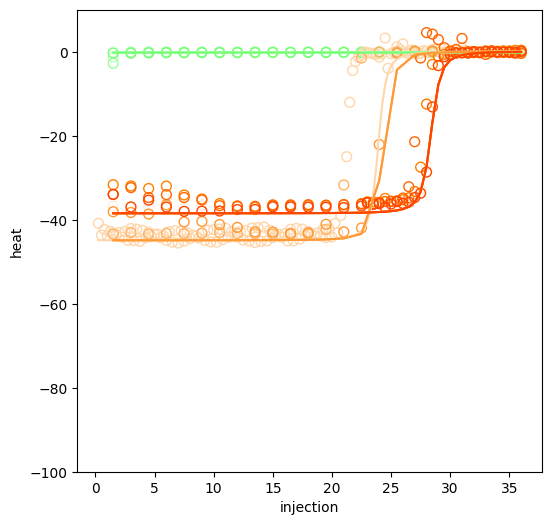

In [11]:
style = {"s":50,
         "facecolor":"none",
         "edgecolor":"black"}
err_style = {"lw":0,
             "elinewidth":1,
             "capsize":2}

orange_list = ['#FFEEDD', '#FFD6AA', '#FFB366', '#FF9933', '#FF8000', '#FF6600', '#FF4400', '#CC3300', '#992200', '#FF0000'] 
purple_list = ['#F2E6FF', '#E0B3FF', '#CC80FF', '#B84DFF', '#A31AFF', '#8800E6', '#6600B3', '#440080', '#2B0052', '#1A0033']
green_list = ['#E8FFE8', '#C1FFC1', '#9AFF9A', '#74FF74', '#4DFF4D', '#26FF26', '#00E600', '#00B300', '#008000', '#004D00']

edtaca_length = len(edtaca_list)
blank_length = len(blank_list)

color_order = green_list[0:blank_length] + orange_list[0:edtaca_length]

fig, ax = plt.subplots(1,figsize=(6,6))

out_df = gm.as_df.copy()
y_calc = gm.model(np.array(f.fit_df["estimate"]))

for i in np.unique(out_df.expt_id):
    
    style["edgecolor"] = color_order[i]
    err_style["color"] = color_order[i]

    mask = out_df["expt_id"] == i
    this_df = out_df.loc[mask,:]

    
    x_values = np.cumsum(this_df["injection"])
    y_values = np.array(this_df["y_obs"])
    y_err = np.array(this_df["y_std"])/np.mean(this_df["injection"])
    this_y_calc = y_calc[mask]/this_df["injection"]

    y_values = y_values/this_df["injection"]
    
    ax.scatter(x_values,y_values,**style)
    ax.errorbar(x=x_values,
                y=y_values,
                #yerr=y_err,
                **err_style)

    ax.plot(x_values,this_y_calc,'-',color=color_order[i])

ax.set_ylim((-100,10))

plt.xlabel("injection")
plt.ylabel("heat")

In [15]:
# Print column names for one of each type of experiment
print("Blank experiment columns:")
print(blank_list[0].expt_concs.columns)
print("\nEDTA-Ca experiment columns:")
print(edtaca_list[0].expt_concs.columns)


# Check data structure
print("\nSample of concentration data:")
print(edtaca_list[0].expt_concs.head())

Blank experiment columns:
Index(['injection', 'volume', 'ET'], dtype='object')

EDTA-Ca experiment columns:
Index(['injection', 'volume', 'CT', 'ET'], dtype='object')

Sample of concentration data:
   injection     volume       CT       ET
0   0.000000 201.300000 0.000500 0.000000
1   2.350000 203.650000 0.000494 0.000035
2   1.500100 205.150100 0.000491 0.000056
3   1.500100 206.650200 0.000487 0.000078
4   1.500100 208.150300 0.000484 0.000099


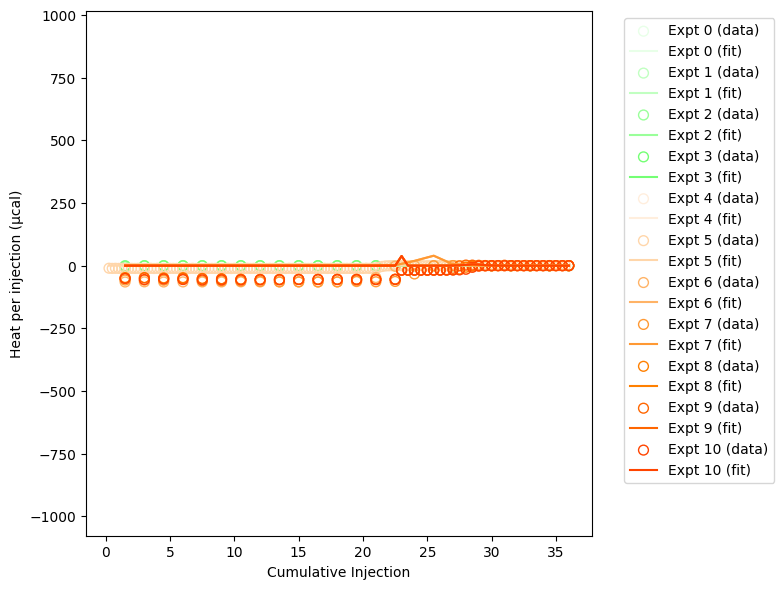

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Plot settings
style = {"s": 50, "facecolor": "none"}
orange_list = ['#FFEEDD', '#FFD6AA', '#FFB366', '#FF9933', '#FF8000', '#FF6600', '#FF4400', '#CC3300', '#992200', '#FF0000'] 
purple_list = ['#F2E6FF', '#E0B3FF', '#CC80FF', '#B84DFF', '#A31AFF', '#8800E6', '#6600B3', '#440080', '#2B0052', '#1A0033']
green_list = ['#E8FFE8', '#C1FFC1', '#9AFF9A', '#74FF74', '#4DFF4D', '#26FF26', '#00E600', '#00B300', '#008000', '#004D00']

# Get fitted parameters and calculate theoretical heats
params = np.array(f.fit_df["estimate"])
y_calc = gm.model(params)

fig, ax = plt.subplots(1, figsize=(8,6))

# Get overall y range from experimental data to set limits
y_min = gm.as_df["y_obs"].min()
y_max = gm.as_df["y_obs"].max()
y_range = y_max - y_min
y_limits = [y_min - 15*y_range, y_max + 15*y_range]

# Plot each experiment
for i in np.unique(gm.as_df.expt_id):
    style["edgecolor"] = color_order[i]
    
    # Get data for this experiment using gm.as_df
    mask = gm.as_df.expt_id == i
    this_df = gm.as_df.loc[mask,:]
    
    # Get theoretical heats for this experiment
    heats = y_calc[mask]
    # Calculate injection-to-injection differences
    heat_diffs = np.diff(heats, prepend=heats[0])
    
    # Get experimental points
    x_values = np.cumsum(this_df["injection"])
    y_values = this_df["y_obs"]
    
    # Plot experimental points
    ax.scatter(x_values, y_values, 
              **style,
              label=f'Expt {i} (data)')
    
    # Plot theoretical curve using differences
    ax.plot(x_values, heat_diffs, '-',
            color=color_order[i],
            label=f'Expt {i} (fit)')

ax.set_xlabel('Cumulative Injection')
ax.set_ylabel('Heat per injection (μcal)')
ax.set_ylim(y_limits)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
fig = dataprob.plot_corner(f)

In [ ]:
fig = dataprob.plot_summary(f)


In [ ]:
# No error consideration
style = {
    "s": 50,
    "facecolor": "none",
    "edgecolor": "black"
}

orange_list = ['#FFEEDD', '#FFD6AA', '#FFB366', '#FF9933', '#FF8000', '#FF6600', '#FF4400', '#CC3300', '#992200', '#FF0000'] 
purple_list = ['#F2E6FF', '#E0B3FF', '#CC80FF', '#B84DFF', '#A31AFF', '#8800E6', '#6600B3', '#440080', '#2B0052', '#1A0033']
green_list = ['#E8FFE8', '#C1FFC1', '#9AFF9A', '#74FF74', '#4DFF4D', '#26FF26', '#00E600', '#00B300', '#008000', '#004D00']

edtaca_length = len(edtaca_list)
prot_length = len(prot_list)
blank_length = len(blank_list)
color_order = green_list[0:blank_length] + orange_list[0:edtaca_length] + purple_list[0:prot_length]

fig, ax = plt.subplots(1, figsize=(6,6))
out_df = gm.as_df.copy()
y_calc = gm.model(np.array(f.fit_df["estimate"]))

for i in np.unique(out_df.expt_id):
    style["edgecolor"] = color_order[i]
    mask = out_df["expt_id"] == i
    this_df = out_df.loc[mask,:]
    
    x_values = np.cumsum(this_df["injection"])
    y_values = np.array(this_df["y_obs"])
    this_y_calc = y_calc[mask]/this_df["injection"]
    y_values = y_values/this_df["injection"]
    
    ax.scatter(x_values, y_values, **style)
    ax.plot(x_values, this_y_calc, '-', color=color_order[i])
    
plt.xlabel("injection")
plt.ylabel("heat")
f.fit_df